# Guilium testing design

  Guilium is a GUI testing tools base on checkmate automata and webdriver communication.
  
## Module
    
### Parser

### Test generater/collector

### Communication

### Process

### Validate

### Results

### Reporter

## Test procedure

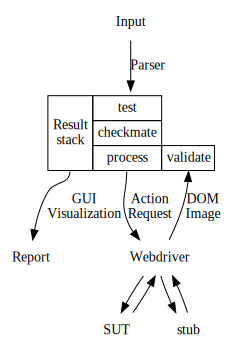

In [5]:
from graphviz import Digraph

G = Digraph(name='test-procedure', node_attr={'shape': 'plaintext'})
G.node('Input')
G.node('Report')
G.node('Checkmate', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
  <TR>
    <TD ROWSPAN="3" PORT="result">Result<BR/>stack</TD>
    <TD COLSPAN="3">test</TD>
  </TR>
  <TR>
    <TD >checkmate</TD>
  </TR>
  <TR>
    <TD COLSPAN="3" PORT="process">process</TD>
    <TD COLSPAN="3" PORT="validate">validate</TD>
  </TR>
</TABLE>>''', center='true')
G.edge('Input', 'Checkmate', label='Parser')
G.edge('Checkmate:result', 'Report', label='GUI\nVisualization')
G.edge('Checkmate:process', 'Webdriver', label='Action\nRequest')
G.edge('Webdriver', 'Checkmate:validate', label='DOM\nImage')

G.node('SUT')
G.node('stub')
G.edge('SUT', 'Webdriver')
G.edge('Webdriver', 'SUT')
G.edge('stub', 'Webdriver')
G.edge('Webdriver', 'stub')

G

## Architecture

### base desgin

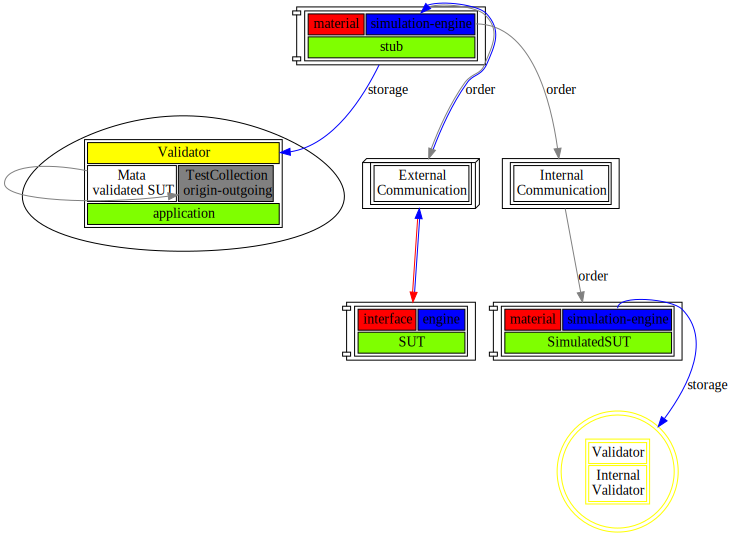

In [10]:
import base_communication
base = base_communication.basedesgin_graphviz()
base

### Auto-Statemachine design

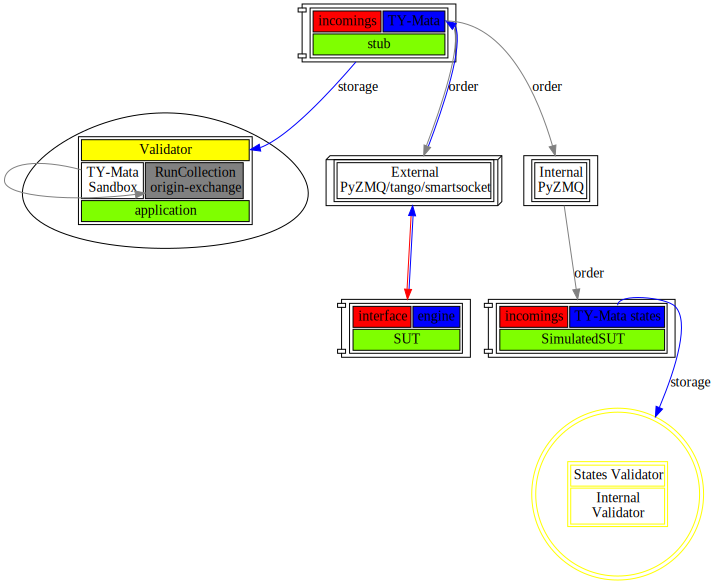

In [3]:
import base_communication
statemachine_config = {
    'app': {
        'mata': 'TY-Mata<BR/>Sandbox',
        'validator': 'Validator',
        'collection': 'RunCollection<BR/>origin-exchange',
    },
    'stub': {
        'material': 'incomings',
        'engine': 'TY-Mata',
    },
    'SUT': {
        'interface': 'interface',
        'engine': 'engine',
    },
    'SimulatedSUT': {
        'material': 'incomings',
        'engine': 'TY-Mata states',
    },
    'InValidator': {
        'validate': 'States Validator',
    },
    'INCOM': {
        'comm': 'Internal<BR/>PyZMQ',
    },
    'EXCOM': {
        'comm': 'External<BR/>PyZMQ/tango/smartsocket',
    },
}
statemachine = base_communication.basedesgin_graphviz(statemachine_config)
statemachine

### Auto-UItesting design

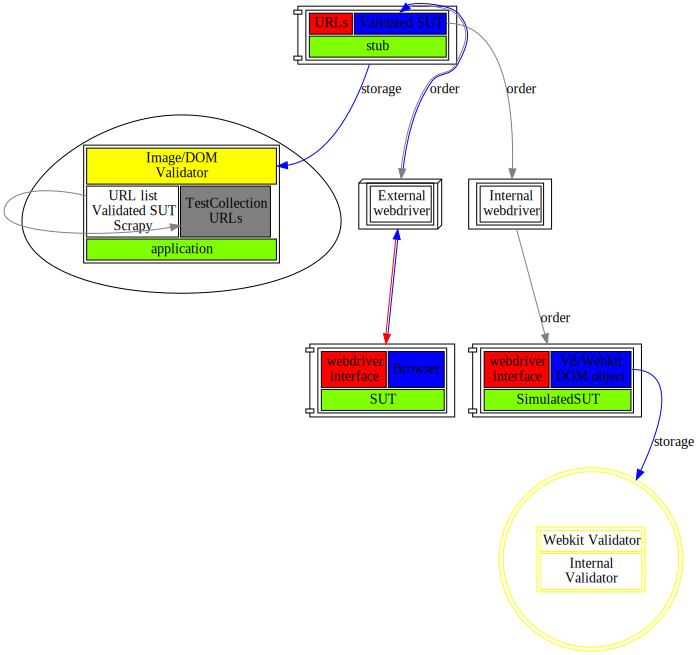

In [9]:
import base_communication
guilium_config = {
    'app': {
        'mata': 'URL list<BR/>Validated SUT<BR/>Scrapy',
        'validator': 'Image/DOM<BR/>Validator',
        'collection': 'TestCollection<BR/>URLs',
    },
    'stub': {
        'material': 'URLs',
        'engine': 'Validated SUT',
    },
    'SUT': {
        'interface': 'webdriver<BR/>interface',
        'engine': 'Browser',
    },
    'SimulatedSUT': {
        'material': 'webdriver<BR/>interface',
        'engine': 'V8/Webkit<BR/>DOM object',
    },
    'InValidator': {
        'validate': 'Webkit Validator',
    },
    'INCOM': {
        'comm': 'Internal<BR/>webdriver',
    },
    'EXCOM': {
        'comm': 'External<BR/>webdriver',
    },
}
UI = base_communication.basedesgin_graphviz(guilium_config)
UI